<center>

# Capítulo 10: O Projeto de Sistemas de Controle com Realimentação

**Aluno(a):** Geovana Stefani Lopes Bezerra

**Disciplina:** Controle e Automação  
**Professor:** Moacy Pereira da Silva  
**Semestre:** 2025.2

Este notebook faz parte do estudo dirigido da disciplina de Controle e Automação com foco em aplicações de Indústria 4.0.  
</center>


## 10.1 Abordagem ao projeto de sistemas

O projeto de um sistema de controle por realimentação tem como objetivo moldar o comportamento da planta de modo que ela siga um desempenho desejado, mesmo diante de incertezas de modelo e perturbações externas. O capítulo 10 aborda o fluxo de projeto usual:

1. Modelar a planta e definir requisitos (tempo de acomodação, erro estacionário, margens de fase e ganho, sobressinal).
2. Escolher a arquitetura de controle (realimentação simples, compensador em cascata, etc.).
3. Utilizar análises no domínio da frequência (Bode), domínio do tempo e lugar das raízes para entender o comportamento do sistema.
4. Projetar compensadores (lead, lag, PI, PD) para moldar a resposta do sistema.
5. Validar o sistema compensado e ajustar conforme necessário.

Relação com a Indústria 4.0:
A Indústria 4.0 exige sistemas robustos e com alta performance, capazes de operar com redes, atrasos, sensores conectados e variação de carga. O projeto por realimentação garante estabilidade e desempenho mesmo em ambiente variável.

## 10.2 Estruturas de compensação em cascata

Um compensador em cascata possui a forma geral:

$$ G_c(s) = K \frac{\prod (s + z_i)}{\prod (s + p_i)} $$

Para o compensador lead/lag simples:

$$ G_c(s) = K \frac{s + z}{s + p} $$

Quando o zero está mais próximo da origem que o polo, o compensador fornece avanço de fase (lead). Quando ocorre o contrário, obtém-se atraso de fase (lag).

Na Indústria 4.0, compensadores lead são úteis para robôs e atuadores rápidos, enquanto compensadores lag ajudam a melhorar precisão estacionária em processos industriais.


## 10.3 Projeto de Compensador de Avanço de Fase Utilizando o Diagrama de Bode

A forma padrão de um compensador lead:

$$ G_c(s) = K \frac{1 + \tau s}{1 + \alpha \tau s}, \qquad 0 < \alpha < 1 $$

A frequência onde ocorre o avanço máximo de fase é:

$$ \omega_m = \frac{1}{\tau \sqrt{\alpha}} $$

E o avanço máximo:

$$ \phi_{max} = \sin^{-1}\left(\frac{1 - \alpha}{1 + \alpha}\right). $$

Fluxo típico de projeto:

* Escolher a frequência de cruzamento desejada.
* Determinar a fase adicional necessária.
* Calcular ( \alpha ) e ( \tau ).
* Ajustar o ganho ( K ) para que o sistema opere na frequência de cruzamento.

Na Indústria 4.0, este tipo de compensação é crucial para manter margens robustas diante de atrasos em rede e comunicação entre dispositivos.


## 10.4 Projeto de avanço de fase usando o Lugar das raízes

O lugar das raízes mostra como os polos fechados se movem conforme variamos o ganho. Serve para entender se o acréscimo de ganho torna o sistema estável ou instável.

Aplicações na Indústria 4.0:

* Ajuste de controladores em máquinas com cargas variáveis.
* Transições seguras entre modos de operação.


## 10.5 Projeto de Compensador de Atraso de Fase Utilizando o Lugar das Raízes

In [1]:
! pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.6 MB/s eta 0:00:00


Planta: G(s) = 10/(s(s+1))
Margens sem compensação: {'gain_margin': inf, 'phase_margin': np.float64(17.964235916371365), 'wg': nan, 'wp': np.float64(3.0842328377167627)}
Projetando compensador lead para margem de fase desejada = 50.0 graus


/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/control/lti.py:646: FutureWarning: freqresp() is deprecated; use frequency_response()
  warn("freqresp() is deprecated; use frequency_response()", FutureWarning)


Resumo do projeto:
  Frequência de cruzamento: 0.846 rad/s
  alpha = 0.83281, tau = 1.29514, K = 0.10114
  phi_max usado = 5.23 graus
  Margem de fase obtida = 55.00 graus


/usr/local/lib/python3.12/dist-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


<Figure size 800x600 with 0 Axes>

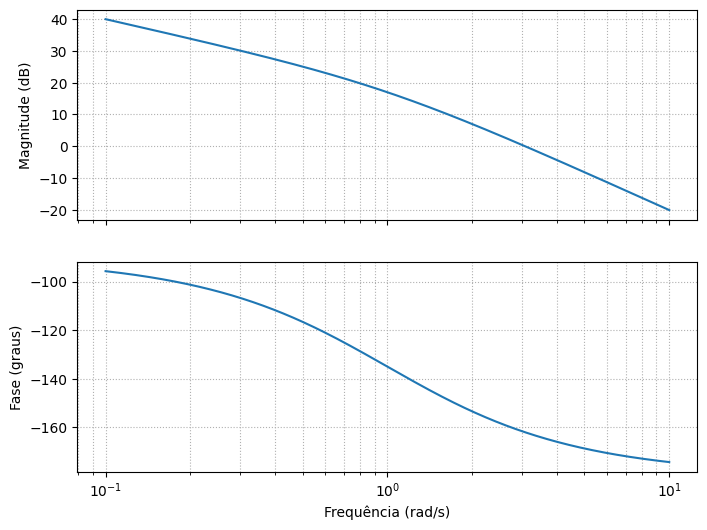

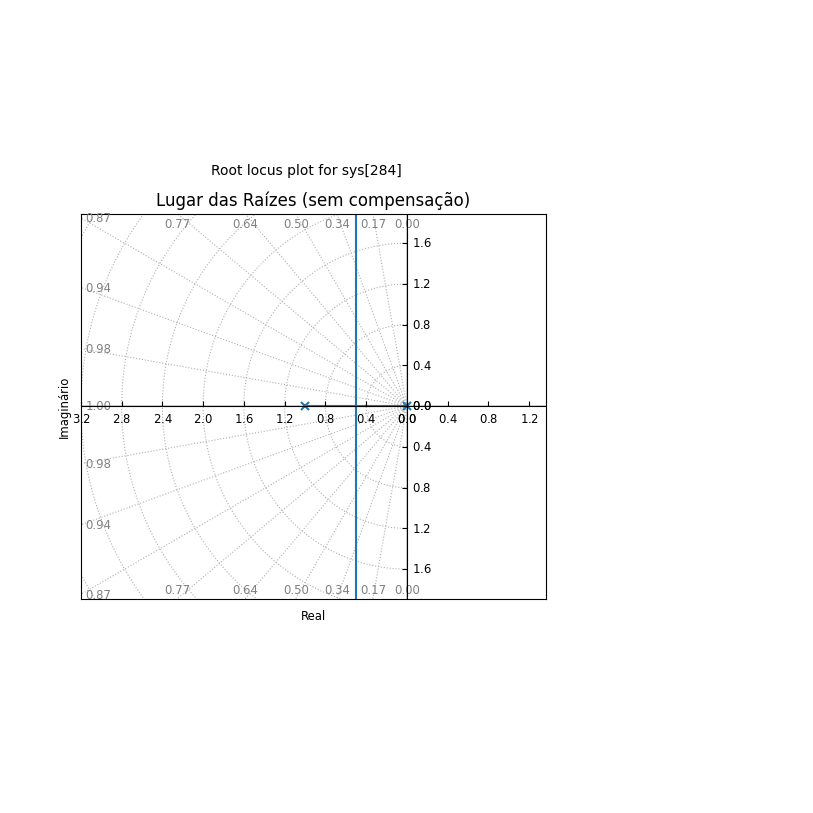

<Figure size 800x600 with 0 Axes>

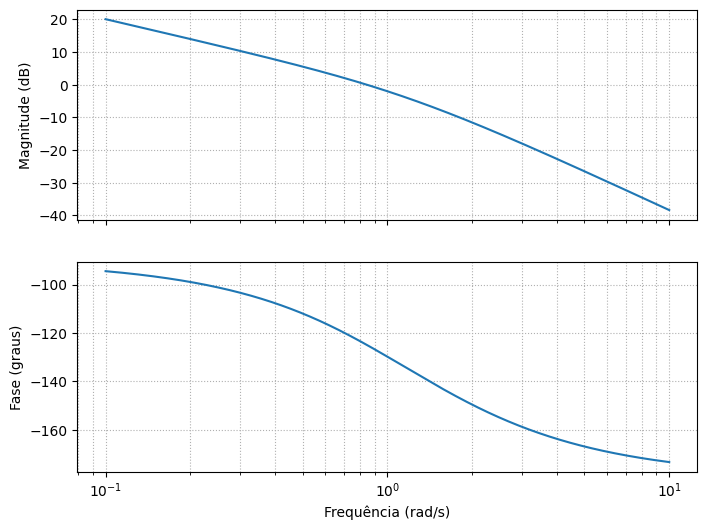

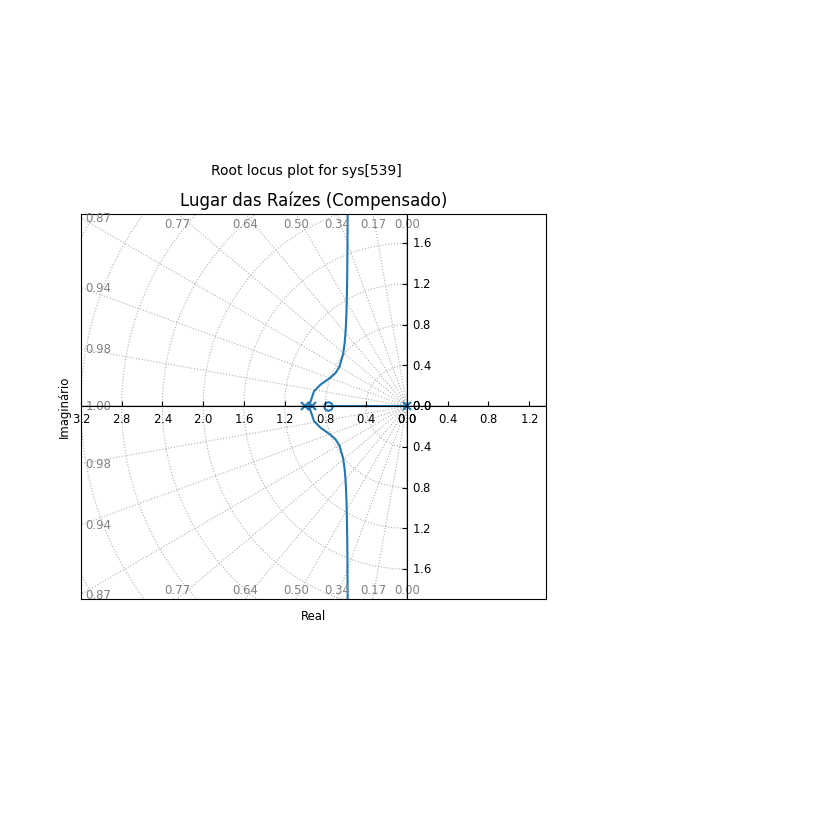

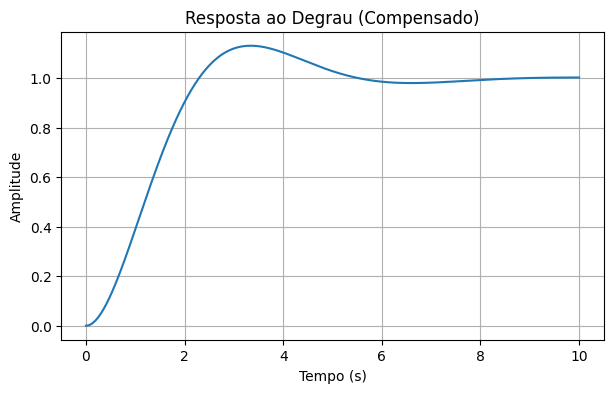

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def plot_bode_with_margins(sys, dB=True, title=None, ax=None):
    mag, phase, omega = ctrl.bode(sys, dB=dB, plot=False)
    if ax is None:
        fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    else:
        fig = None

    if dB:
        mag_db = 20 * np.log10(mag + 1e-20)
        ax[0].semilogx(omega, mag_db)
        ax[0].set_ylabel('Magnitude (dB)')
    else:
        ax[0].semilogx(omega, mag)
        ax[0].set_ylabel('Magnitude')
    ax[0].grid(True, which='both', ls=':')

    ax[1].semilogx(omega, np.degrees(phase))
    ax[1].set_ylabel('Fase (graus)')
    ax[1].set_xlabel('Frequência (rad/s)')
    ax[1].grid(True, which='both', ls=':')

    gm, pm, wg, wp = ctrl.margin(sys)
    return dict(gain_margin=gm, phase_margin=pm, wg=wg, wp=wp)

def plot_root_locus(sys, title=None):
    plt.figure(figsize=(6,5))
    ctrl.root_locus(sys, plot=True, grid=True)
    if title:
        plt.title(title)
    plt.xlabel('Real')
    plt.ylabel('Imaginário')

def plot_step_response(closed_loop_sys, title=None, T=None):
    if T is None:
        T = np.linspace(0, 10, 1000)
    t, y = ctrl.step_response(closed_loop_sys, T=T)
    plt.figure(figsize=(7,4))
    plt.plot(t, y)
    if title:
        plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.grid(True)
    plt.ylabel('Amplitude')

def make_example_plant():
    G = ctrl.TransferFunction([10], [1, 1, 0])
    return G

def design_lead_compensator_for_pm(G, desired_pm_deg, wc_search=np.logspace(-1, 2, 1000), safety_deg=5.0):
    gm0, pm0, wg0, wp0 = ctrl.margin(G)
    best = None
    desired_pm = desired_pm_deg

    for wc in wc_search:

        mag, phase, _ = ctrl.freqresp(G, [wc])
        mag = mag[0]
        phase = phase[0]

        phase_deg = np.degrees(phase)

        required_total_phase = -180.0 + desired_pm
        required_phi_add = required_total_phase - phase_deg

        if required_phi_add <= 0:
            continue

        phi_max_deg = required_phi_add + safety_deg
        if phi_max_deg >= 60:
            continue

        phi_max_rad = np.radians(phi_max_deg)
        alpha = (1 - np.sin(phi_max_rad)) / (1 + np.sin(phi_max_rad))

        if alpha <= 0 or alpha >= 1:
            continue

        tau = 1.0 / (wc * np.sqrt(alpha))

        num = [tau, 1.0]
        den = [alpha * tau, 1.0]

        Gc0 = ctrl.TransferFunction(num, den)

        mag_gc0, _, _ = ctrl.freqresp(Gc0 * G, [wc])
        mag_gc0 = mag_gc0[0]

        if mag_gc0 == 0:
            continue

        K = 1.0 / mag_gc0
        Gc = K * Gc0
        L = Gc * G
        closed_loop = ctrl.feedback(L, 1)

        gm, pm, wg, wp = ctrl.margin(L)

        if np.isfinite(pm):
            candidate = dict(
                wc=wc, alpha=alpha, tau=tau, K=K,
                phi_max_deg=phi_max_deg, pm_actual=pm,
                gm=gm, wg=wg, wp=wp,
                Gc=Gc, L=L, closed_loop=closed_loop
            )

            if pm >= desired_pm:
                best = candidate
                break

            if best is None or abs(pm - desired_pm) < abs(best['pm_actual'] - desired_pm):
                best = candidate

    return best

def run_demo():
    G = make_example_plant()
    print("Planta: G(s) = 10/(s(s+1))")

    plt.figure(figsize=(8,6))
    margins_before = plot_bode_with_margins(G, title='Bode da Planta (sem compensação)')
    print("Margens sem compensação:", margins_before)

    plot_root_locus(G, title='Lugar das Raízes (sem compensação)')

    desired_pm_deg = 50.0
    print(f"Projetando compensador lead para margem de fase desejada = {desired_pm_deg} graus")

    candidate = design_lead_compensator_for_pm(G, desired_pm_deg, wc_search=np.logspace(-1, 2, 800))
    if candidate is None:
        print("Nenhum compensador encontrado. Ajuste a busca.")
        return

    print("Resumo do projeto:")
    print(f"  Frequência de cruzamento: {candidate['wc']:.3f} rad/s")
    print(f"  alpha = {candidate['alpha']:.5f}, tau = {candidate['tau']:.5f}, K = {candidate['K']:.5f}")
    print(f"  phi_max usado = {candidate['phi_max_deg']:.2f} graus")
    print(f"  Margem de fase obtida = {candidate['pm_actual']:.2f} graus")

    plt.figure(figsize=(8,6))
    plot_bode_with_margins(candidate['L'], title='Bode com Compensador Lead')

    plot_root_locus(candidate['L'], title='Lugar das Raízes (Compensado)')

    plot_step_response(candidate['closed_loop'], title='Resposta ao Degrau (Compensado)', T=np.linspace(0,10,1000))
    plt.show()


run_demo()

## 10.6 Projeto para a resposta rápida sem oscilação

O objetivo deste projeto é desenvolver um sistema de controle cuja resposta ao degrau seja extremamente rápida e com oscilações praticamente inexistentes. Esse tipo de resposta é conhecido como resposta deadbeat, e é ideal em situações onde o transitório deve ser o mais curto possível sem comprometer a estabilidade ou causar ultrapassagens significativas.

As principais características de um sistema projetado para resposta rápida sem oscilação são:

1. Erro de regime permanente nulo  
   O sistema deve atingir exatamente o valor de referência, o que normalmente exige um integrador na malha.

2. Tempo de resposta muito curto  
   A escolha da frequência natural desejada, indicada por  
   $$ \omega_n $$  
   define o tempo de subida e o tempo de acomodação.

3. Ultrapassagem muito pequena  
   Idealmente menor que 2%, podendo ser quase nula em um sistema bem amortecido.

4. Undershoot igualmente pequeno  
   Tipicamente menor que 2%.

Para esse tipo de projeto, o modelo de segunda ordem clássico é utilizado com amortecimento elevado, geralmente  
$$ \zeta \ge 0.9 $$  
pois isso garante pouca oscilação.

O modelo padrão de segunda ordem utilizado como referência é:

$$
T(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
$$

A partir de um tempo de acomodação especificado pelo projetista, pode-se determinar a frequência natural desejada:

Para  
$$ \zeta \approx 1 $$  
temos:

$$
t_s \approx \frac{4}{\omega_n}
$$

Assim, basta escolher  
$$ \omega_n $$  
de acordo com o desempenho desejado.


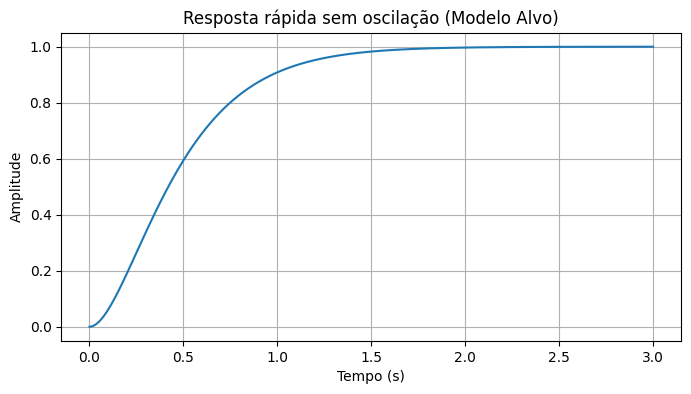

In [8]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

zeta = 1.0                  
ts_desejado = 1.0           
wn = 4 / ts_desejado        

num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
T_target = ctrl.TransferFunction(num, den)

t = np.linspace(0, 3, 500)
t_out, y_out = ctrl.step_response(T_target, T=t)

plt.figure(figsize=(8,4))
plt.plot(t_out, y_out)
plt.title('Resposta rápida sem oscilação (Modelo Alvo)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
